In [5]:
import os
os.chdir("/Users/jacksonwalters/Documents/GitHub/enefit-kaggle/predict-energy-behavior-of-prosumers/")
!ls

client.csv                            gas_prices.csv
county_id_to_name_map.json            historical_weather.csv
electricity_prices.csv                public_timeseries_testing_util.py
enefit                                train.csv
example_test_files                    weather_station_to_county_mapping.csv
forecast_weather.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
#load the training data
training_data = pd.read_csv("train.csv")

In [4]:
#drop NaN rows
training_data = training_data.dropna()

In [5]:
#helper function to convert strings to integers representing a time
from datetime import datetime
def datestr_to_int(datetime_str):
    return datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S').timestamp()

In [6]:
#drop the target variable to get the training data
X = training_data.drop("target", axis=1)
X['datetime'] = X['datetime'].apply(datestr_to_int)

In [7]:
#set the target variable
y = training_data['target']

In [8]:
#verify there are no NaN's
np.any(np.isnan(y))

False

In [9]:
len(y)

2017824

In [28]:
# load the modeling modules from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import mean_absolute_error

In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
#create a multivariable linear regression
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [13]:
lin_pred = regr.predict(X_test)

In [14]:
mean_absolute_error(lin_pred,y_test)

365.56037557403886

In [15]:
X

,county,is_business,product_type,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0,1.630469e+09,0,0,0
1,0,0,1,1,1.630469e+09,0,1,0
2,0,0,2,0,1.630469e+09,0,2,1
3,0,0,2,1,1.630469e+09,0,3,1
4,0,0,3,0,1.630469e+09,0,4,2
...,...,...,...,...,...,...,...,...
2018347,15,1,0,1,1.685588e+09,637,2018347,64
2018348,15,1,1,0,1.685588e+09,637,2018348,59
2018349,15,1,1,1,1.685588e+09,637,2018349,59
2018350,15,1,3,0,1.685588e+09,637,2018350,60


In [27]:
#train the random forest regressor
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [17]:
#predict the target values using the random forest regressor
y_pred = rf.predict(X_test)

In [18]:
#mean absolute error for random regressor
mean_absolute_error(y_test,y_pred)

25.459279260589994

In [6]:
forecast_weather = pd.read_csv("forecast_weather.csv")

In [7]:
forecast_weather

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,57.6,21.7,2021-08-31 23:00:00+00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 00:00:00+00:00,0.0,0.0,0.0,0.0
1,57.6,22.2,2021-08-31 23:00:00+00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 00:00:00+00:00,0.0,0.0,0.0,0.0
2,57.6,22.7,2021-08-31 23:00:00+00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 00:00:00+00:00,0.0,0.0,0.0,0.0
3,57.6,23.2,2021-08-31 23:00:00+00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 00:00:00+00:00,0.0,0.0,0.0,0.0
4,57.6,23.7,2021-08-31 23:00:00+00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 00:00:00+00:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424507,59.7,26.2,2023-05-29 23:00:00+00:00,48,10.150049,5.662744,0.061066,0.257339,0.004059,0.308594,6.890626,-3.258144,637,2023-05-31 23:00:00+00:00,0.0,0.0,0.0,0.0
3424508,59.7,26.7,2023-05-29 23:00:00+00:00,48,10.259790,5.922754,0.107880,0.895203,0.198700,0.906036,6.890626,-3.768032,637,2023-05-31 23:00:00+00:00,0.0,0.0,0.0,0.0
3424509,59.7,27.2,2023-05-29 23:00:00+00:00,48,10.467798,6.072534,0.000000,0.387466,0.448853,0.530518,6.214112,-4.700405,637,2023-05-31 23:00:00+00:00,0.0,0.0,0.0,0.0
3424510,59.7,27.7,2023-05-29 23:00:00+00:00,48,10.694116,7.009058,0.000000,0.505936,0.997314,0.997498,5.810060,-4.338345,637,2023-05-31 23:00:00+00:00,0.0,0.0,0.0,0.0


In [8]:
import matplotlib.pyplot as plt

In [9]:
weather_data = forecast_weather["direct_solar_radiation"].dropna()

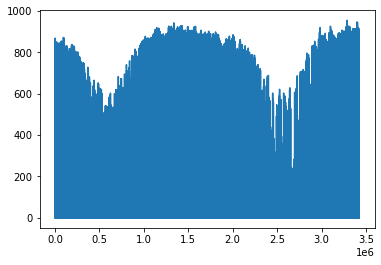

In [10]:
plt.plot(weather_data)

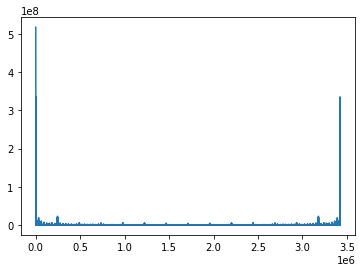

In [12]:
#plot the abs of the Fourier transformed weather data
from scipy.fft import fft
weather_data_fft = fft(np.array(weather_data))
weather_data_fft_abs=[abs(x) for x in weather_data_fft]
plt.plot(weather_data_fft_abs)